# Health Insurance Cost Prediction 

### 1. Exploratory Data Analysis

####  1.1 Importing required libraries 


In [545]:
import numpy as np
import pandas as pd
data = pd.read_csv('Insurance data.csv')
import seaborn as sb
sb.set()
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [546]:
data = data.dropna()

#### 1.2 Exploring data

In [547]:
# Data types of all columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [548]:
# Checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [549]:
# Displaying statistical data in each numerical column
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [550]:
# Showing range of interval variables
n_variables = ['age','bmi','children','charges']
for v in n_variables:
    x = data[v].max()
    y = data[v].min()
    print(v,'column has data range from', x, 'and', y)

age column has data range from 64 and 18
bmi column has data range from 53.13 and 15.96
children column has data range from 5 and 0
charges column has data range from 63770.42801 and 1121.8739


In [552]:
# Creating groups and categorizing data
data['cbmi'] = pd.cut(data.bmi,[0,18,25,30,60],labels=['underweight','normalweight','overweight','obese'])
data['cage'] = pd.cut(data.age,[10,20,30,40,50,60,70],labels=['10-19','20-29','30-39','40-49','50-59','60-69'])
# Viewing data 
data.head()

,age,sex,bmi,children,smoker,region,charges,cbmi,cage
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,10-19
1,18,male,33.770,1,no,southeast,1725.55230,obese,10-19
2,28,male,33.000,3,no,southeast,4449.46200,obese,20-29
3,33,male,22.705,0,no,northwest,21984.47061,normalweight,30-39
4,32,male,28.880,0,no,northwest,3866.85520,overweight,30-39


#### 1.3 Graph Plotting 

#### Displaying count of the categories in each feature using countplot

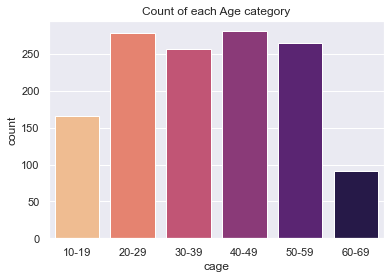

In [553]:
fig1 = sb.countplot(data['cage'],palette = 'magma_r').set_title('Count of each Age category')

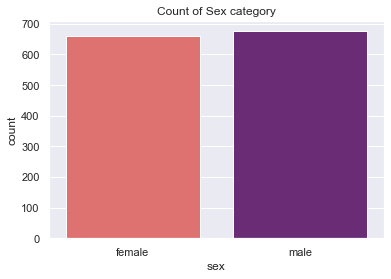

In [554]:
fig2 = sb.countplot(data['sex'],palette = 'magma_r').set_title('Count of Sex category')

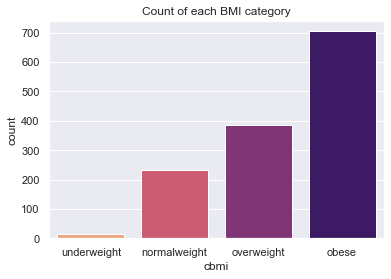

In [555]:
fig3 = sb.countplot(data['cbmi'],palette = 'magma_r').set_title('Count of each BMI category')

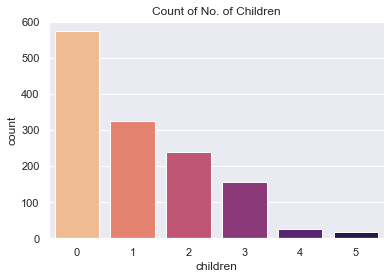

In [556]:
fig4 = sb.countplot(data['children'],palette = 'magma_r').set_title('Count of No. of Children')


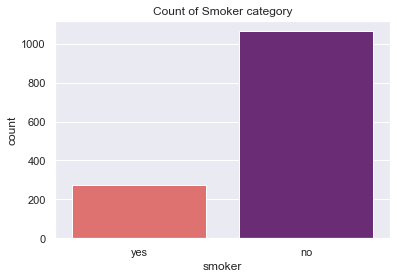

In [557]:
fig5 = sb.countplot(data['smoker'],palette = 'magma_r').set_title('Count of Smoker category')

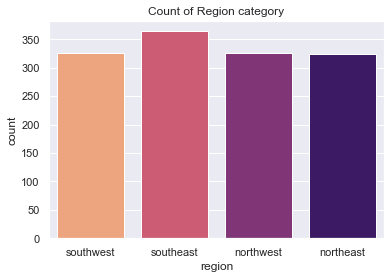

In [558]:
fig5 = sb.countplot(data['region'],palette = 'magma_r').set_title('Count of Region category')

#### Observing Correlation between all numeric variables using heatmap

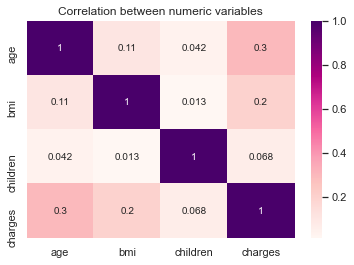

In [560]:
corr = data.corr()
fig6 = sb.heatmap(corr,annot = True ,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdPu").set_title('Correlation between numeric variables')

#### Feature Distribution plotted against charges using Swarmplot

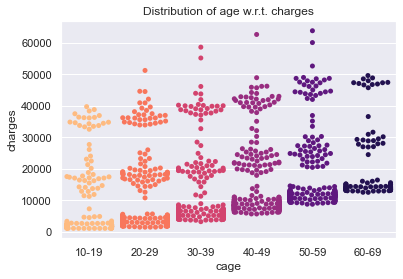

In [561]:
fig7 = sb.swarmplot(x="cage", y="charges", data=data,palette='magma_r').set_title('Distribution of age w.r.t. charges')

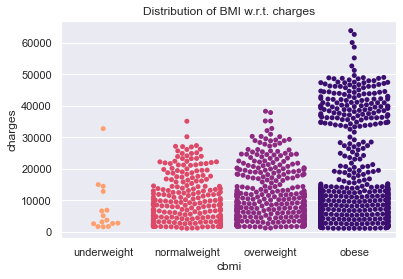

In [562]:
fig8 = sb.swarmplot(x="cbmi", y="charges", data=data,palette='magma_r').set_title('Distribution of BMI w.r.t. charges')

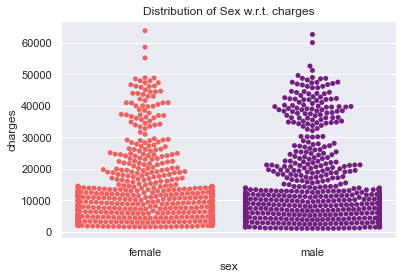

In [563]:
fig9 = sb.swarmplot(x="sex", y="charges", data=data,palette='magma_r').set_title('Distribution of Sex w.r.t. charges')

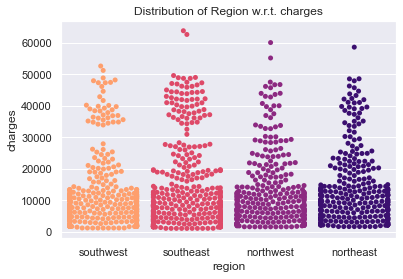

In [564]:
fig10 = sb.swarmplot(x="region", y="charges", data=data,palette='magma_r').set_title('Distribution of Region w.r.t. charges')

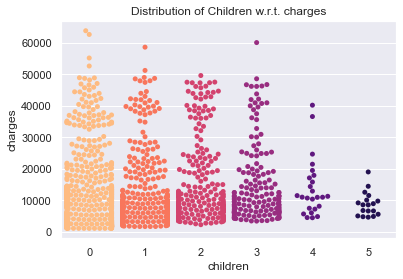

In [565]:
fig11 = sb.swarmplot(x="children", y="charges", data=data,palette='magma_r').set_title('Distribution of Children w.r.t. charges')

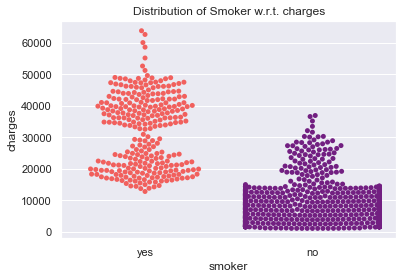

In [566]:
fig12 = sb.swarmplot(x="smoker", y="charges", data=data,palette='magma_r').set_title('Distribution of Smoker w.r.t. charges')

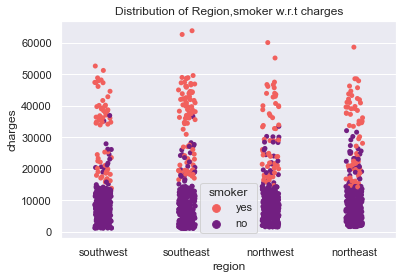

In [567]:
fig13 = sb.stripplot(x="region",y="charges",data= data,jitter=True,hue='smoker',palette='magma_r').set_title('Distribution of Region,smoker w.r.t charges')

#### Outlier Detection using box plots

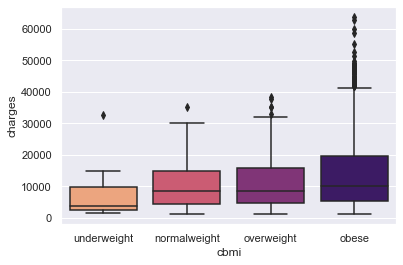

In [568]:
fig14 = sb.boxplot(x='cbmi',y='charges',data= data,palette='magma_r')

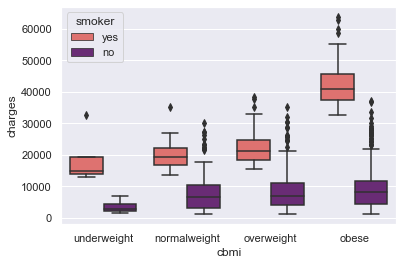

In [569]:
fig15 = sb.boxplot(x="cbmi",y="charges",hue="smoker",data= data, palette="magma_r")

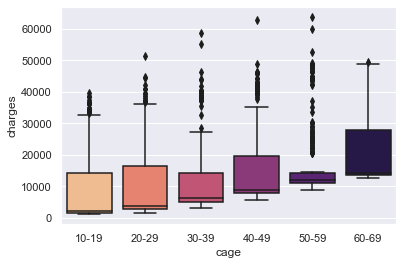

In [570]:
fig16 = sb.boxplot(x='cage',y='charges',data= data,palette='magma_r')

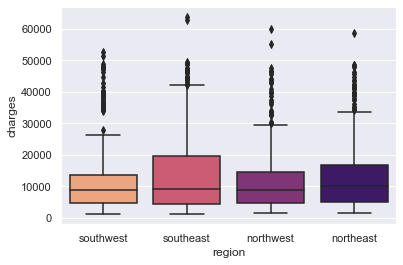

In [571]:
fig17 = sb.boxplot(x='region',y='charges',data= data,palette='magma_r')

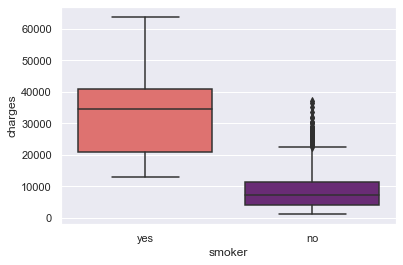

In [572]:
fig18 = sb.boxplot(x='smoker',y='charges',data= data,palette='magma_r')

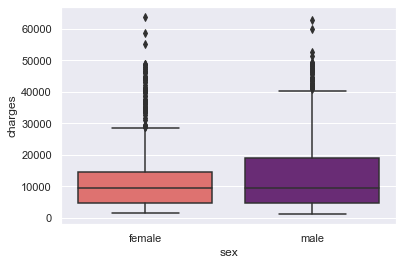

In [573]:
fig19 = sb.boxplot(x='sex',y='charges',data= data,palette='magma_r')

#### Plotting a pairplot 

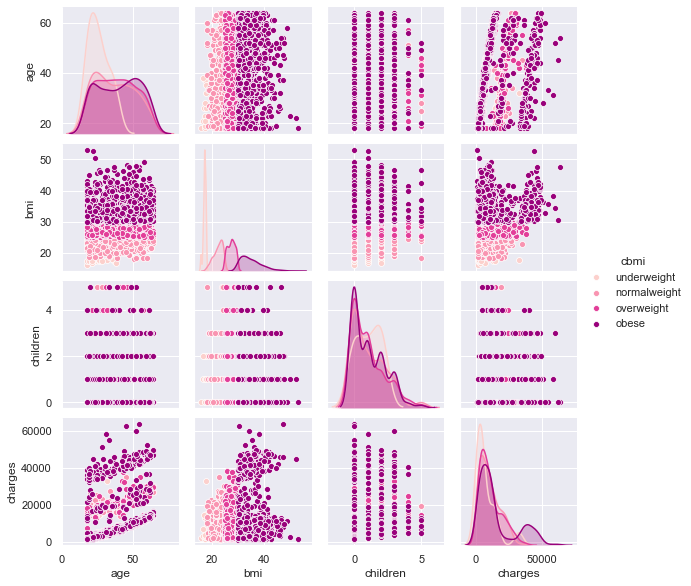

In [574]:
fig20 = sb.pairplot(data,height=2,hue = 'cbmi',palette = 'RdPu') 

### 2. Data Preparation

In [575]:
#Creating Dummy values for the categorical fields
catCol = ['sex','smoker','region']
data_dum = pd.get_dummies(data, columns = catCol)
data_dum.head()


,age,bmi,children,charges,cbmi,cage,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,overweight,10-19,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,obese,10-19,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,obese,20-29,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,normalweight,30-39,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,overweight,30-39,0,1,1,0,0,1,0,0


In [576]:
# sex_female and sex_male, smoker_no and smoker_yes conveyed same information so we keep 1 column of each.
# data_dum2 will be used from now on
data_dum2 = data_dum.drop(['sex_male','smoker_no'],axis = 1)

In [577]:
# Assigning columns to X and Y
X = data_dum2[['age','bmi','smoker_yes','children','region_northeast','region_southeast','region_northwest','region_southwest']]
Y = data_dum2[['charges']]

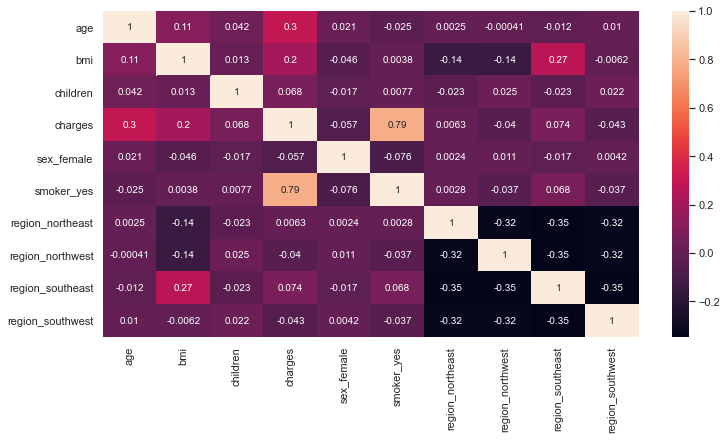

In [578]:
# Displaying a heatmap with all the features
fig = plt.figure(figsize=(12,6))
hp = sb.heatmap(data_dum2.corr(),annot = True)

## 3. Model Building

### 3.1 Normal Linear Regression

In [579]:
# Splitting data into training and testing sets 
# 20% of data is taken as the test set and 80% as training set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [580]:
# Creating the model and training it 
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [581]:
# Displaying coefficients for each of the features
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model_1.coef_))],axis = 1)
coefficients

,0,0
0,age,256.981312
1,bmi,337.057832
2,smoker_yes,23649.493726
3,children,425.157482
4,region_northeast,459.464240
5,region_southeast,-198.005607
6,region_northwest,88.561337
7,region_southwest,-350.019970


In [582]:
# Displaying Intercept value
print('Intercept of the Linear Regression model',model_1.intercept_)

Intercept of the Linear Regression model [-12399.02216384]


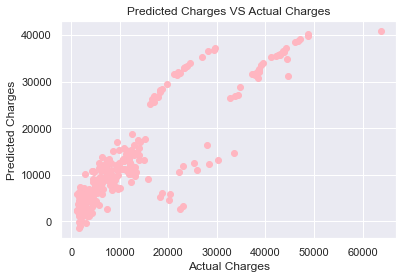

Evaluation Metrics for Normal Linear Regression
R Squared : 0.78
Mean Squared Error : 33602504.51
Root Mean Squared Error : 5796.77
Mean Absolute Error : 4182.01


In [583]:
# Plotting the Predicted Charges Vs Actual Charges graph 
Y1_pred = model_1.predict(X_test)
plt.scatter(Y_test,Y1_pred,color = 'lightpink')
plt.title('Predicted Charges VS Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Displaying Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('Evaluation Metrics for Normal Linear Regression')
print('R Squared : %.2f' % r2_score(Y_test, Y1_pred))
print("Mean Squared Error : %.2f" % mean_squared_error(Y_test, Y1_pred))
Rmse = sqrt(mean_squared_error(Y_test, Y1_pred))
print('Root Mean Squared Error : %.2f' % Rmse)
print('Mean Absolute Error : %.2f'% mean_absolute_error(Y_test, Y1_pred))

### 3.2 Gradient Descent

In [584]:
# For Gradient Descent we will scale the data 
from sklearn import preprocessing
# Scaling x values 
x_age = preprocessing.scale(data_dum2['age'])
x_bmi = preprocessing.scale(data_dum2['bmi'])
x_sex = preprocessing.scale(data_dum2['sex_female'])
x_smoker = preprocessing.scale(data_dum2['smoker_yes'])
x_regionNE = preprocessing.scale(data_dum2['region_northeast'])
x_regionNW = preprocessing.scale(data_dum2['region_northwest'])
x_regionSE = preprocessing.scale(data_dum2['region_southeast'])
x_regionSW = preprocessing.scale(data_dum2['region_southwest'])
# Scaling y values
gdy = preprocessing.scale(data_dum2['charges'])
# Concatinating a row of 1's with all the x values 
gdx = np.c_[np.ones(x_age.shape[0]),x_age, x_bmi,x_sex,x_smoker,x_regionNE,x_regionNW,x_regionSE,x_regionSW]

In [585]:
# Implementing the Gradient Descent Function
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   # records all cost values to this list
    theta_list = []  # records all theta values to this list 
    prediction_list = []
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while (i< 40000):
        prediction = np.dot(x, theta)   #predicted y values 
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            i = 40001

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [586]:
# Setting the parameters
alpha = 0.0001   #learning rate
m = gdy.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(9)

In [587]:
# Calling the Gradient Descent Function 
prediction_list, cost_list, theta_list = gradient_descent(gdx,gdy, m, theta, alpha)
theta = theta_list[-1]


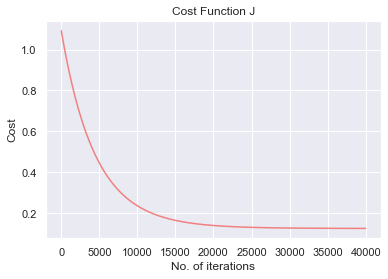

In [588]:
# Plotting the Cost Function value with no. of iterations
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_list, color ='lightcoral' )
plt.show()

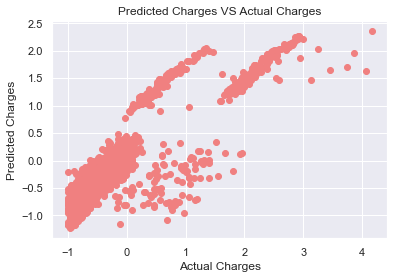

Evaluation Metrics for Gradient Descent
R Square : 0.75
Mean Square Error : 0.252
Root Mean Square Error : 0.502


In [590]:
# Plotting Predicted vs Actual Charges 
plt.scatter(gdy,prediction_list[-1], color = 'lightcoral')
plt.title('Predicted Charges VS Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Displaying the Evaluation Metrics
print('Evaluation Metrics for Gradient Descent')
r_square = 1- np.sum((gdy - prediction_list[-1])**2)/np.sum(((gdy-gdy.mean())**2))
print('R Square : %.2f'% r_square)
MSE_GD = ((prediction_list[-1]-gdy)**2).mean()  #From Gradient Descent
print('Mean Square Error : {}'.format(round(MSE_GD,3)))
RMSE = sqrt(MSE_GD)
print('Root Mean Square Error : {}'.format(round(RMSE,3)))


### 3.3 Stochastic Gradient Descent

In [591]:
from sklearn.linear_model import SGDRegressor
from numpy import random
# We will scale the x and y values 
y = preprocessing.scale(data_dum2['charges'])
x = np.c_[x_age, x_bmi,x_sex,x_smoker,x_regionNE,x_regionNW,x_regionSE,x_regionSW]

In [592]:
# Splitting into training and testing sets
# 30% of data for testing and 70% for training 
sX_train, sX_test, sY_train, sY_test = train_test_split(x,y, test_size=0.3, random_state=0)

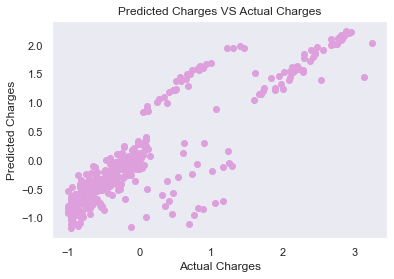

Evaluation Metrics for Stochastic Gradient Descent
R square : 0.79
Mean Squared Error :0.23
Root mean squared error : 0.48
Mean absolute error : 0.33


In [593]:
# Implementing SkLearn SGD classifier

n_iter=100 # no. Of iterations
# creating the model 
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(sX_train, sY_train)
# making predictions
y_pred_sksgd=clf_.predict(sX_test)

# Plotting the graph of predicted vs actual values of charges 
plt.scatter(sY_test,y_pred_sksgd, color = 'plum')
plt.grid()
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges VS Actual Charges')
plt.show()

# Displaying the Evaluation Metrics
print('Evaluation Metrics for Stochastic Gradient Descent')
print('R square : %.2f' % r2_score(sY_test, y_pred_sksgd))
print('Mean Squared Error :%.2f' % mean_squared_error(sY_test, y_pred_sksgd))
Rmse = sqrt(mean_squared_error(sY_test, y_pred_sksgd))
print('Root mean squared error : %.2f' % Rmse)
print('Mean absolute error : %.2f'% mean_absolute_error(sY_test, y_pred_sksgd))

 ### 3.4 Mini-Batch Gradient Descent

In [598]:
# We will use Scaled data for Mini-Batch Gradient Descent 
from sklearn.model_selection import train_test_split 

y = preprocessing.scale(data_dum2['charges'])
x = np.c_[x_age, x_bmi,x_sex,x_smoker,x_regionNE,x_regionNW,x_regionSE,x_regionSW]

# Splitting into training and testing sets 
# 10% of data for testing and 90% for training 
mbX_train, mbX_test, mbY_train, mbY_test = train_test_split(X, Y, test_size=1/10, random_state=0)

In [599]:
# linear regression using "mini-batch" gradient descent 
# function to compute predictions 

def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.0000005, batch_size = 10): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 5
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

Intercept =  [207.7035193]
Coefficients =  [[154.41214667]
 [ 12.087182  ]
 [  7.40547474]
 [  1.3745793 ]
 [  2.26186789]
 [  0.53866686]
 [  0.25162664]]


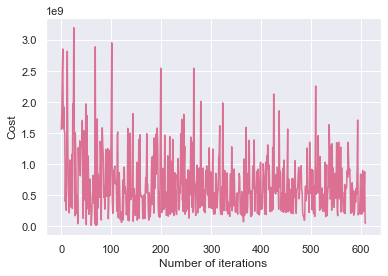

In [600]:
# Calling the Mini-batch Gradient Descent function 
theta, error_list = gradientDescent(mbX_train, mbY_train)

# Displaying intercept and coefficients
print("Intercept = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# Plotting the Cost Function value with no. of iterations
plt.plot(error_list, color = 'palevioletred') 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

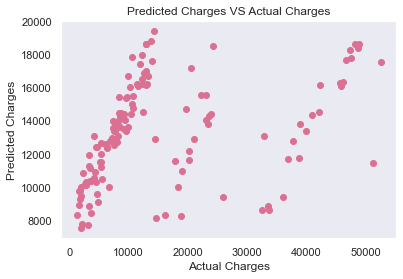

Evaluation Metrics for Mini-Batch Gradient Descent
R Square : 0.09
Mean Square Error : 55754428.03
Root Mean Square Error : 7466.89
Mean absolute error : 10033.05


In [601]:

# predicting output for X_test 
mby_pred = hypothesis(mbX_test, theta) 

# calculating error in predictions 
error = np.sum(np.abs(mbY_test - mby_pred) / mbY_test.shape[0])
rmse = sqrt(error_list[-1])
r_square = 1 - np.sum((mby_pred - mbY_test )**2)/ np.sum((mbY_test-(mbY_test).mean())**2)

# Plotting Graph of Predicted vs actual charges 
plt.scatter(mbY_test,mby_pred, color = 'palevioletred')
plt.grid()
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges VS Actual Charges')
plt.show()


# Displaying Evaluation Metrics
print('Evaluation Metrics for Mini-Batch Gradient Descent')
print('R Square : %.2f'% r_square)
print('Mean Square Error : %.2f'%error_list[-1])
print('Root Mean Square Error : %.2f'%rmse)
print('Mean absolute error : %.2f'%error) 

